In [1]:
import pandas as pd
import numpy as np
import math, copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
house_prices = pd.read_csv("data/house.csv")
house_prices

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126


In [3]:
house_prices.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


In [4]:
def null_count(df):

    df_nulls = {'columns': [], 'qt_nulls': []}

    for column in df.columns:

        qt_nulls = df[column].isnull().sum()

        df_nulls['columns'].append(column)
        df_nulls['qt_nulls'].append(qt_nulls)
    
    return pd.DataFrame(df_nulls)

null_count(house_prices)

,columns,qt_nulls
0,bedroom_count,0
1,net_sqm,0
2,center_distance,0
3,metro_distance,0
4,floor,0
5,age,0
6,price,0


# Data Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(house_prices), columns=house_prices.columns)

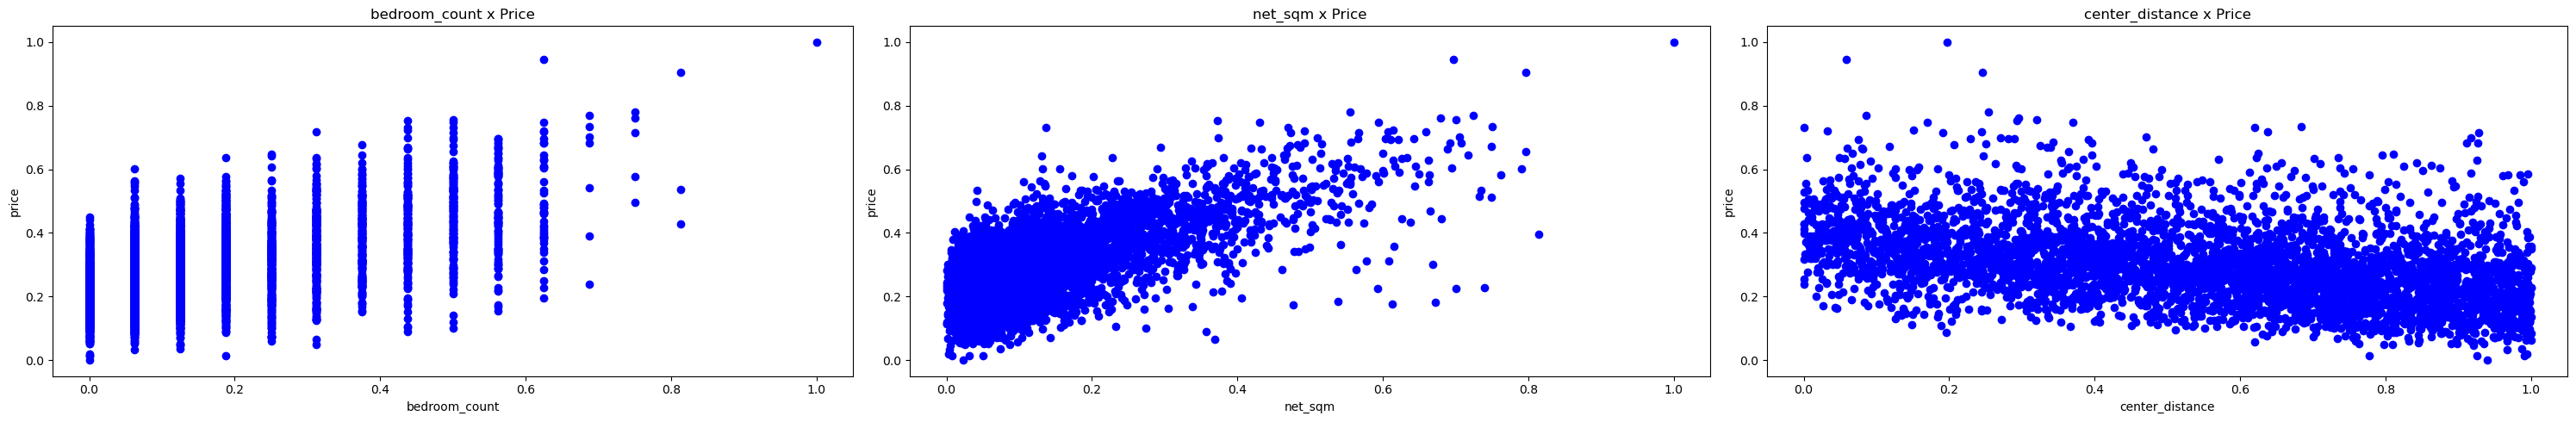

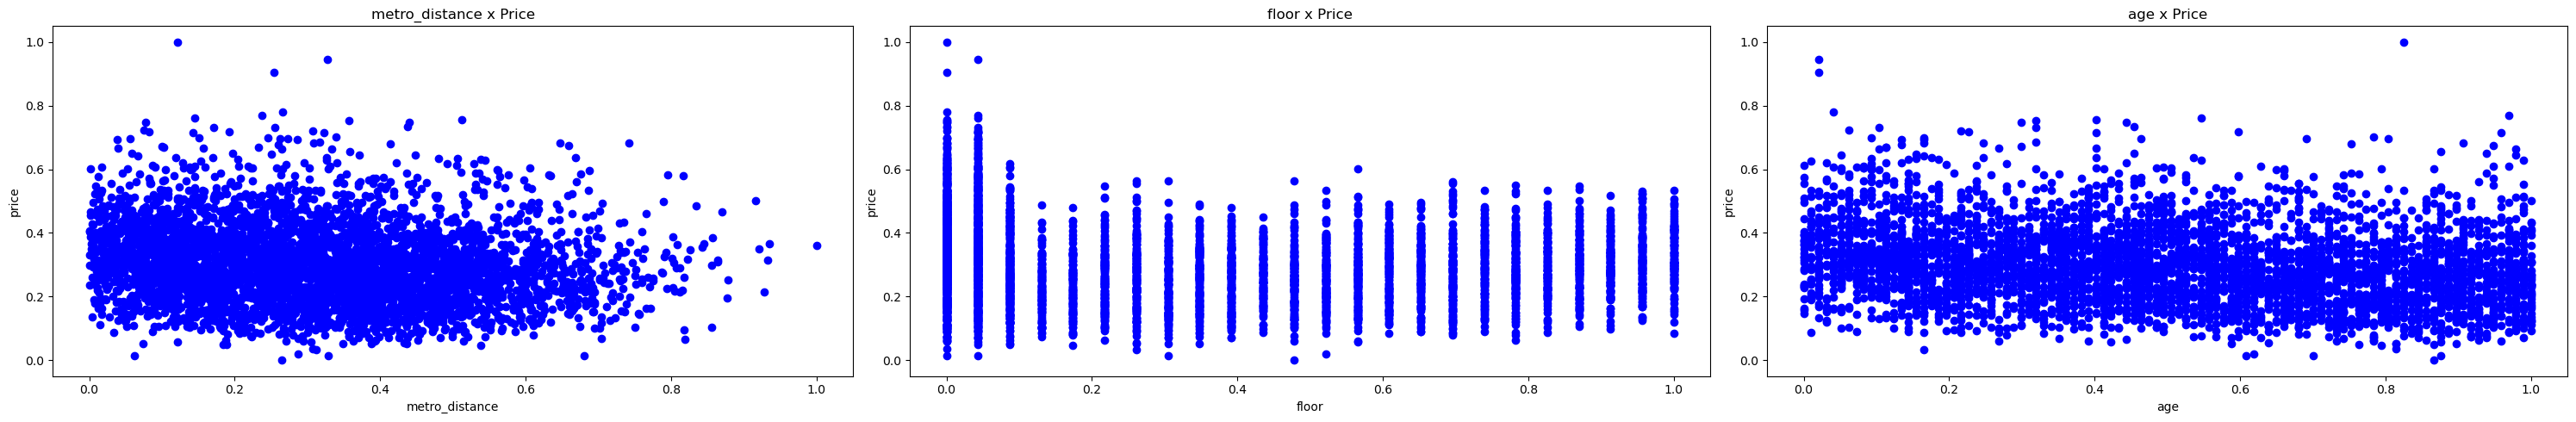

In [6]:
def scatter (num_plot, column) : 

    axs[num_plot].scatter(df_norm[column], df_norm['price'], color='blue')
    axs[num_plot].set_xlabel(column)
    axs[num_plot].set_ylabel('price')
    axs[num_plot].set_title(f'{column} x Price')


fig, axs = plt.subplots(1, 3, figsize=(30,5))
scatter(0, 'bedroom_count')
scatter(1, 'net_sqm')
scatter(2, 'center_distance')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(30,5))
scatter(0, 'metro_distance')
scatter(1, 'floor')
scatter(2, 'age')
plt.tight_layout()
plt.show()

# Modeling - Manual Multiple Linear Regression

In [7]:
train, test = train_test_split(df_norm, test_size=0.3, random_state=98)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

## Matrix X
- Matrix containing training data, where each row represents an example, and each column represent an feature.

In [8]:
train_columns = df_norm.drop('price', axis=1).columns
target_column = 'price'

x_train = train[train_columns]
y_train = train[target_column]

x_test = test[train_columns]
y_test = test[target_column]

In [10]:
print(f"X Shape: {x_train.shape}, X Type : {type(x_train)}")
print(f"Y Shape: {y_train.shape}, Y Type : {type(y_train)}")

X Shape: (3015, 6), X Type : <class 'pandas.core.frame.DataFrame'>
Y Shape: (3015,), Y Type : <class 'pandas.core.series.Series'>


## Parameter Vectors w,b
- **w** is a vector with n elements
- Each element contains the parameter associated with one feature.

In [13]:
b_init = 0.2
w_init = np.array([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

print(f"w_init shape: {w_init.shape}\nb_init type : {type(w_init)}")

w_init shape: (6,)
b_init type : <class 'numpy.ndarray'>


## Model Prection with Multiple Variables

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

## Single Prediction Element by Element

In [22]:
def predict_single_loop (x,w,b): 

    # n = features
    n = x.shape[0]

    # p = predictions 
    p = 0

    # For each feature, the model will compute a value based on the parameter, and then sum up the results along with the intercept. 
    for i in range(n) :

        p_i = x.iloc[i] * w[i]
        p = p + p_i
    
    p = p + b
    return p

In [24]:
#The features values of the first example in the training dataset.
x_vec = x_train.loc[0,:]
y_ex = y_train.loc[0]

#prediction 
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape : {f_wb.shape}\nprediction: {f_wb}\nreal y: {y_ex}")

f_wb shape : ()
prediction: 2.607422658769246
real y: 0.3134608127867873


## Single Prediction by Vector
- We can do these predictions without a looping through each element, by using Vector Operations.

In [26]:
def predict (x, w, b):

    p = np.dot(x, w) + b

    return p

In [28]:
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape : {f_wb.shape}\nprediction: {f_wb}\nreal y: {y_ex}")

f_wb shape : ()
prediction: 2.6074226587692455
real y: 0.3134608127867873


## The Regularization term has used to treat high variance or high bias of or prediction, making the parameters not so large or so small
- It is most used in more complex models, like polynomials, where parameters can become very large or small values

- Decreasing lambda = fixes high bias
- Increasing lambda = fixes high variance

## Compute Cost with Multiple Variables with Regularization

- The J(w,b) :

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$ 

In [31]:
def compute_cost(x, y, w, b, lambda_=1):

    m = x.shape[0]
    n = len(w)
    cost = 0.0

    for i in range(m):

        # Multiple variables linear regression
        f_wb_i = np.dot(x.iloc[i], w) + b

        # Sum os Costs
        cost = cost + (f_wb_i - y.iloc[i]) ** 2

    # Division by 2*m is convenient to simplify calculations and normalize the cost function
    cost = cost / (2 * m)

    # Regularization term
    reg_cost = 0
    
    #
    for j in range(n):

        reg_cost += (w[j]**2)
    
    reg_cost = (lambda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost

    return total_cost

In [32]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"Cost at optimal w: {cost}")

Cost at optimal w: 2.0740342660482987


## Gradient Descent with Multiple Variables


$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


## Compute Gradient with Multiple Variables : 

There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.

In [34]:
def compute_gradient(x, y, w, b):

    # m = examples os training dataset, n = number of features 
    m,n = x.shape

    # List of partial derivates of parameters
    dj_dw = np.zeros((n,))

    # Partial derivate of intercept
    dj_db = 0.

    # First Looping : Compute the mean of partial derivate of all examples
    for i in range(m):

        # First : Compute the error of prediction
        err = (np.dot(x.iloc[i], w) + b) - y.iloc[i]

        # Second Loop intern : Compute the partial derivate for each feature and add them.
        for j in range(n):

            #partial derivate = err * x[i, j]
            dj_dw[j] = dj_dw[j] + err * x.iloc[i, j]
        
        # Compute the partial derivate of intercept
        dj_db = dj_db + err
    
    # Mean of Partial Derivates of all parameters across all examples
    dj_dw = dj_dw / m

    # Mean of Partial Derivates of intercept across all examples
    dj_db = dj_db / m

    return dj_db, dj_dw

## Compute Gradient with Regularization

In [133]:
def compute_gradient_reg(x, y, w, b, lambda_=1):

    m, n = x.shape

    dj_db, dj_dw = compute_gradient(x, y, w, b)

    for j in range (n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw 

In [134]:
lambda_ = 0.5

# Compute and display gradient
tmp_dj_db_1, tmp_dj_dw_1 = compute_gradient(x_train, y_train, w_init, b_init)

# Compute and display gradient with reg
tmp_dj_db, tmp_dj_dw = compute_gradient_reg(x_train, y_train, w_init, b_init, lambda_)


print(f"dj_db at initial w, b : {tmp_dj_db_1}")
print(f"dj_dw at initial w, b : {tmp_dj_dw_1}")
print(f"dj_db at initial w, b with Reg : {tmp_dj_db}")
print(f"dj_dw at initial w, b with Reg : {tmp_dj_dw}")

dj_db at initial w, b : 1.940312267044786
dj_dw at initial w, b : [0.32554671 0.28726484 1.17125182 0.68788648 0.78282267 1.05978591]
dj_db at initial w, b with Reg : 1.940312267044786
dj_dw at initial w, b with Reg : [0.32571255 0.28743068 1.17141766 0.68805232 0.78298851 1.05995175]


## Gradient Descent with Multiple Variables

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [135]:
def gradient_descent (x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    # Performs batch gradient descent to learn w and b. Updates w and b by taking num_iters gradient steps with learning rate alpha

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []

    # Avoid modifying global w within function
    w = copy.deepcopy(w_in)

    b = b_in

    # Gradient Descent looping
    for i in range(num_iters):

        #Calculate the gradients
        dj_db, dj_dw = gradient_function(x, y, w, b)

        #Update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        #Save cost J at each iteration
        if i<100000:    #prevent resource exhaustion

            J_history.append(cost_function(x, y, w, b))
        
        #Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d} : Cost {J_history[-1]:0.4f} ")
    
    #return final w, b and J history for graphing
    return w, b, J_history

## Run the Optimazation Model with Gradient Descent

In [136]:
# Initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# Some gradient descent settings
iterations = 1000
alpha = 1.0e-1

# Run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient_reg, alpha, iterations)

print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final} ")

Iteration    0 : Cost 0.0377 
Iteration  100 : Cost 0.0051 
Iteration  200 : Cost 0.0035 
Iteration  300 : Cost 0.0029 
Iteration  400 : Cost 0.0026 
Iteration  500 : Cost 0.0025 
Iteration  600 : Cost 0.0024 
Iteration  700 : Cost 0.0023 
Iteration  800 : Cost 0.0023 
Iteration  900 : Cost 0.0023 
b, w found by gradient descent: 0.30, [ 0.27131948  0.38713419 -0.19404947  0.05139549  0.08235333 -0.08246915] 


## Model Validation

In [137]:
m,_ = x_train.shape

for i in range(m):
    print(f"Prediction : {np.dot(x_train.iloc[i, :], w_final) + b_final: 0.2f} | Target value: {y_train[i]}")

Prediction :  0.30 | Target value: 0.3134608127867873
Prediction :  0.35 | Target value: 0.43921910173318546
Prediction :  0.33 | Target value: 0.3046180578088369
Prediction :  0.41 | Target value: 0.3910880359362898
Prediction :  0.29 | Target value: 0.28192087210275885
Prediction :  0.38 | Target value: 0.4533111048722773
Prediction :  0.19 | Target value: 0.08813552105466504
Prediction :  0.17 | Target value: 0.22697708374468561
Prediction :  0.31 | Target value: 0.2450288920268604
Prediction :  0.39 | Target value: 0.3983197853561804
Prediction :  0.25 | Target value: 0.2300688192159246
Prediction :  0.30 | Target value: 0.3260813315852098
Prediction :  0.22 | Target value: 0.32930353075442786
Prediction :  0.22 | Target value: 0.15243918207979057
Prediction :  0.19 | Target value: 0.22824857677768584
Prediction :  0.39 | Target value: 0.4294101060292683
Prediction :  0.22 | Target value: 0.23822463449145737
Prediction :  0.27 | Target value: 0.3497288718464824
Prediction :  0.19 |

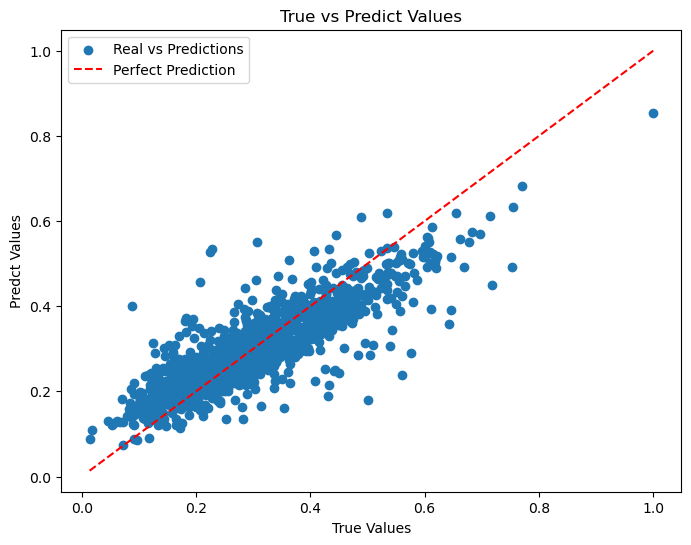

In [138]:
y_pred = (np.dot(x_test, w_final) + b_final).round(3)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label = 'Real vs Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predct Values')
plt.title('True vs Predict Values')
plt.legend()
plt.show()

In [139]:
y_pred = (np.dot(x_test, w_final) + b_final).round(3)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.04957393942241376
Mean Squared Error (MSE): 0.004432454002436944
Root Mean Squared Error (RMSE): 0.06657667761639165
R-squared (R²): 0.7115220696364645


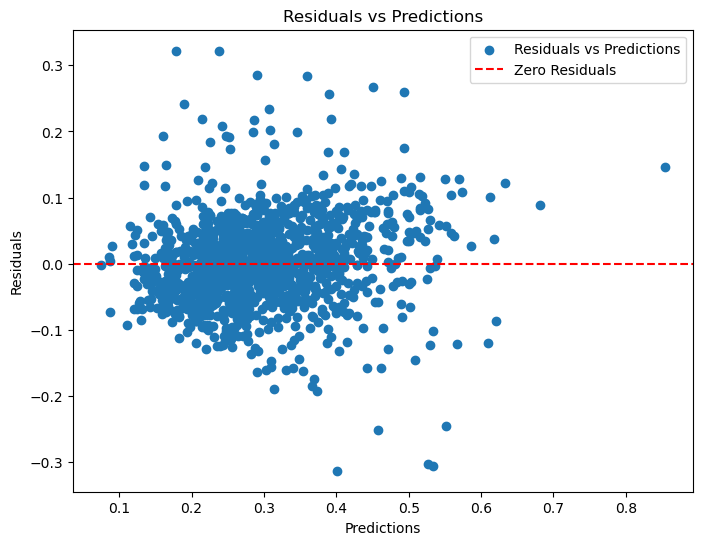

In [140]:
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, label='Residuals vs Predictions')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.legend()
plt.show()

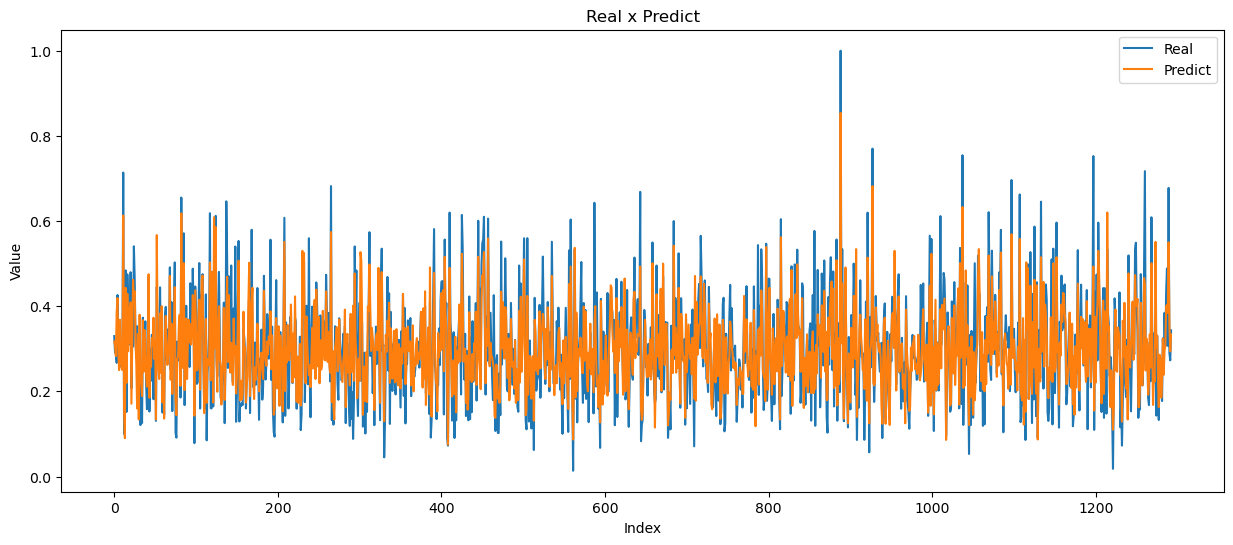

In [141]:
ind = range(len(y_test))

plt.figure(figsize=(15,6))
plt.plot(ind, y_test, label='Real')
plt.plot(ind, y_pred, label='Predict')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Real x Predict')
plt.legend()
plt.show()

# Sklearn Multivariable Linear Regression : Normal Equation

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
sklearn_normal = LinearRegression()

sklearn_normal.fit(x_train, y_train)

LinearRegression()

In [70]:
pred_normal = sklearn_normal.predict(x_test)

In [71]:
mae = mean_absolute_error(y_test, pred_normal)

mse = mean_squared_error(y_test, pred_normal)

rmse = mean_squared_error(y_test, pred_normal, squared=False)

r2 = r2_score(y_test, pred_normal)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.04602949880396446
Mean Squared Error (MSE): 0.0040383370526043795
Root Mean Squared Error (RMSE): 0.06354791147318989
R-squared (R²): 0.7371724298988336


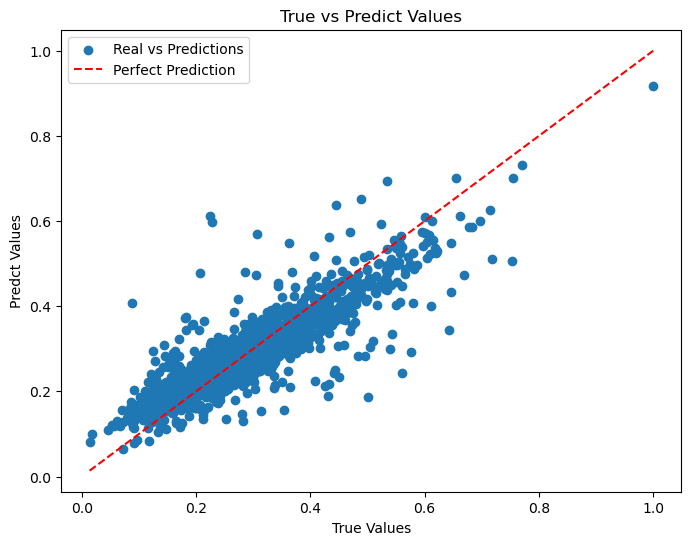

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred_normal, label = 'Real vs Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predct Values')
plt.title('True vs Predict Values')
plt.legend()
plt.show()

# Sklearn Multivariable Linear Regression : Gradient Descent

In [74]:
from sklearn.linear_model import SGDRegressor

In [113]:
model_sgd = SGDRegressor(alpha=1.0e-4, learning_rate='optimal', max_iter=10000, epsilon=0.0001)
model_sgd.fit(x_train, y_train)

SGDRegressor(epsilon=0.0001, learning_rate='optimal', max_iter=10000)

In [114]:
pred_sgd = model_sgd.predict(x_test)

In [115]:
mae = mean_absolute_error(y_test, pred_sgd)

mse = mean_squared_error(y_test, pred_sgd)

rmse = mean_squared_error(y_test, pred_sgd, squared=False)

r2 = r2_score(y_test, pred_sgd)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.04673530771647169
Mean Squared Error (MSE): 0.004123223230816974
Root Mean Squared Error (RMSE): 0.06421232927418981
R-squared (R²): 0.7316477726787527


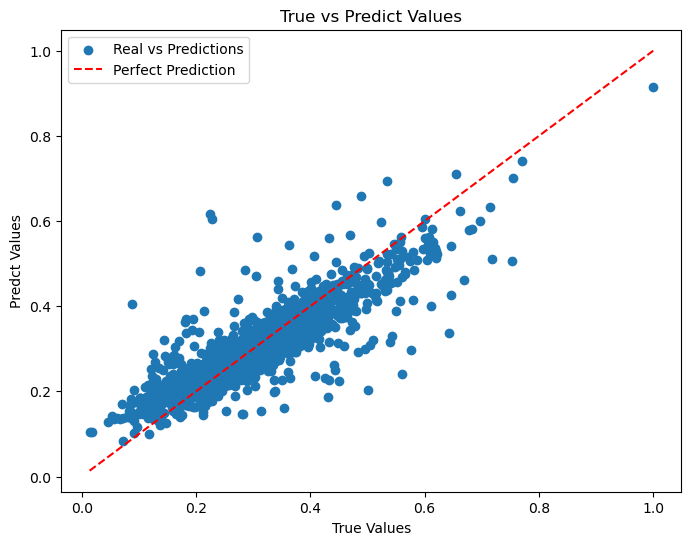

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred_sgd, label = 'Real vs Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predct Values')
plt.title('True vs Predict Values')
plt.legend()
plt.show()